In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

set2_colors = plt.get_cmap("Set2").colors
plt.rcParams['pdf.fonttype'] = 42

In [2]:
# root directory where processed mutation data are stored
# if using the zenodo data, this should point to the location of the base zenodo directory 
data_dir = ""

# directory where the simulation data and table with clonal counts and polyclonal calls are saved
# defaults to path in repo relative to current WD
output_dir = "../../data/clonal_count_estimation/"

save_plots = False
# directory where you want to save pdf and jpg versions of the plots (only use if save_plots = TRUE)
plots_dir = ""

In [3]:
expected_clonal = pd.read_csv(output_dir+"clonal_SNVs_WES_WGS.csv", index_col=0)
combined_maf = pd.read_csv(data_dir+"HTAN_WGS_filtered_ppVAFs.maf", sep="\t")

/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (85,87,88,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
def plot_dist(maf, active_ax, plot_var="vaf", group_var=None, purity=None, common_norm=True, plot_color="darkgrey", xlabel=None, plot_drivers=False):
    if group_var is None:
        sns.kdeplot(x=maf[plot_var], common_norm=common_norm, ax=active_ax, legend=None, color=plot_color)
    else:
        sns.kdeplot(x=maf[plot_var], hue=maf[group_var], common_norm=common_norm, ax=active_ax, legend=None, color=plot_color)
        
    if purity is not None:
        active_ax.axvline(x=purity/2, color="k", linestyle="dashed")
    active_ax.set_xlim(0,1)
    if xlabel is not None:
        active_ax.set_xlabel(xlabel, fontsize=12)
    active_ax.set_ylabel("Density", fontsize=12)
    
    if plot_drivers:
        drivers = maf[maf["Driver"]]
        for vaf in drivers[drivers["Hugo_Symbol"]=="APC"]["vaf"]:
            active_ax.axvline(x=vaf, color="r")
        for vaf in drivers[drivers["Hugo_Symbol"]=="KRAS"]["vaf"]:
            active_ax.axvline(x=vaf, color="orange")
    return

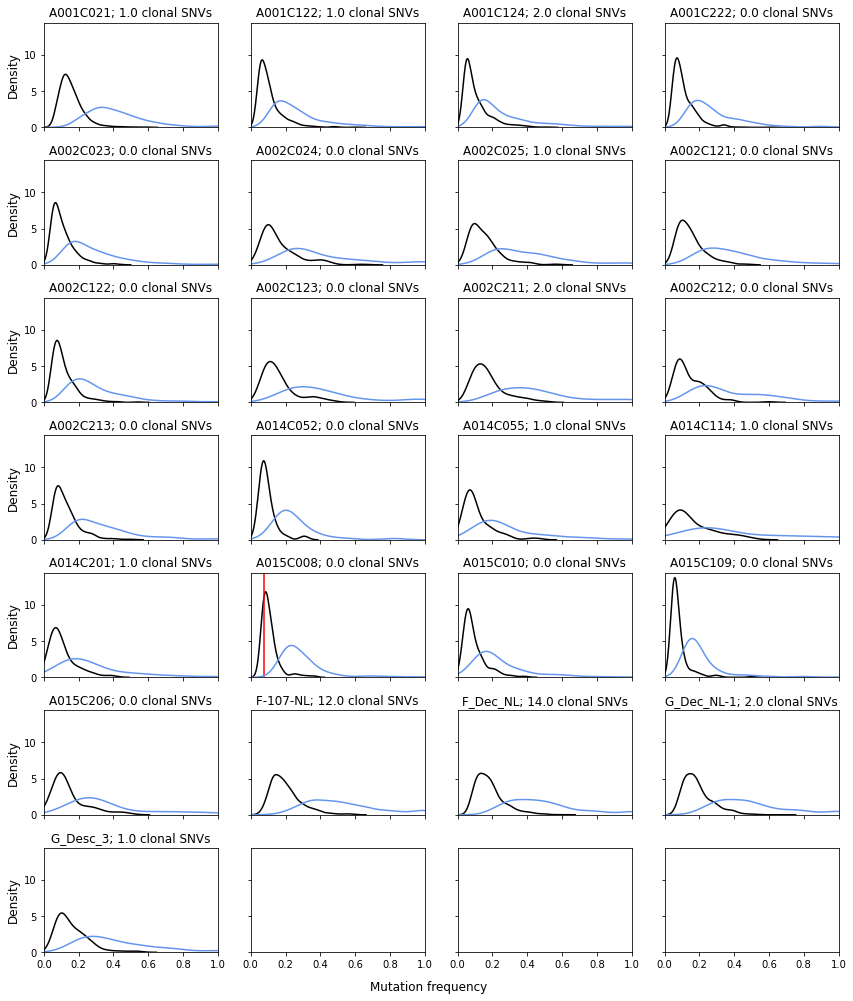

In [5]:
to_plot = combined_maf[combined_maf["Stage"]=="Mucosa"]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WGS"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"mucosa_WGS.pdf")
    plt.savefig(plots_dir+"mucosa_WGS.jpg")
plt.show()

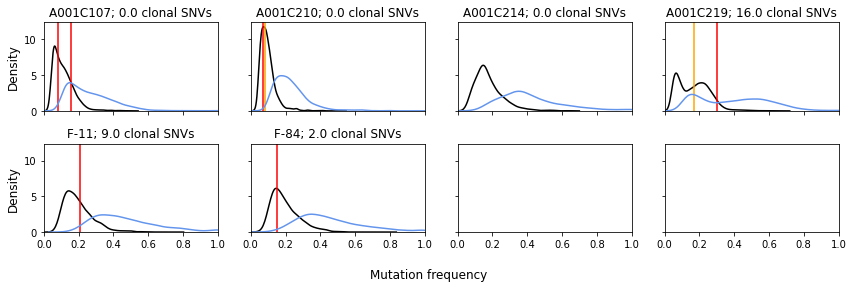

In [6]:
to_plot = expected_clonal[np.logical_and(expected_clonal["stage"]=="Benign", expected_clonal["is_poly"])].index
to_plot = combined_maf[np.isin(combined_maf["Tumor_Sample_Barcode"], to_plot)]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WGS"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"benign_poly_WGS.pdf")
    plt.savefig(plots_dir+"benign_poly_WGS.jpg")
plt.show()

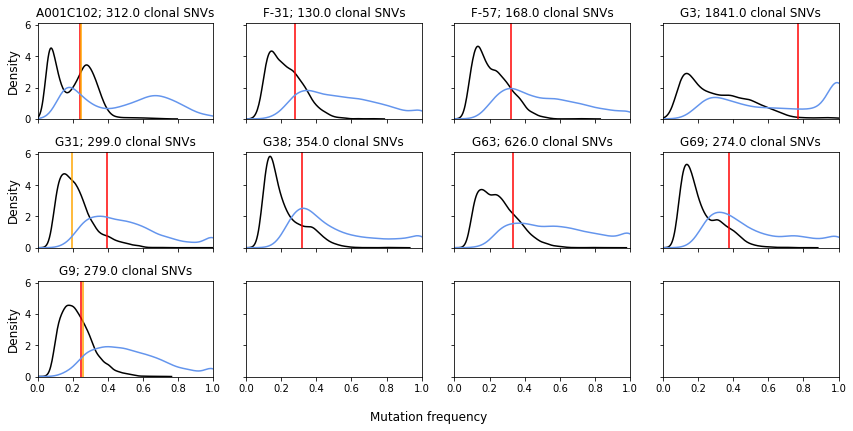

In [7]:
to_plot = expected_clonal[np.logical_and(expected_clonal["stage"]=="Benign", ~expected_clonal["is_poly"])].index
to_plot = combined_maf[np.isin(combined_maf["Tumor_Sample_Barcode"], to_plot)]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WGS"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"benign_mono_WGS.pdf")
    plt.savefig(plots_dir+"benign_mono_WGS.jpg")
plt.show()

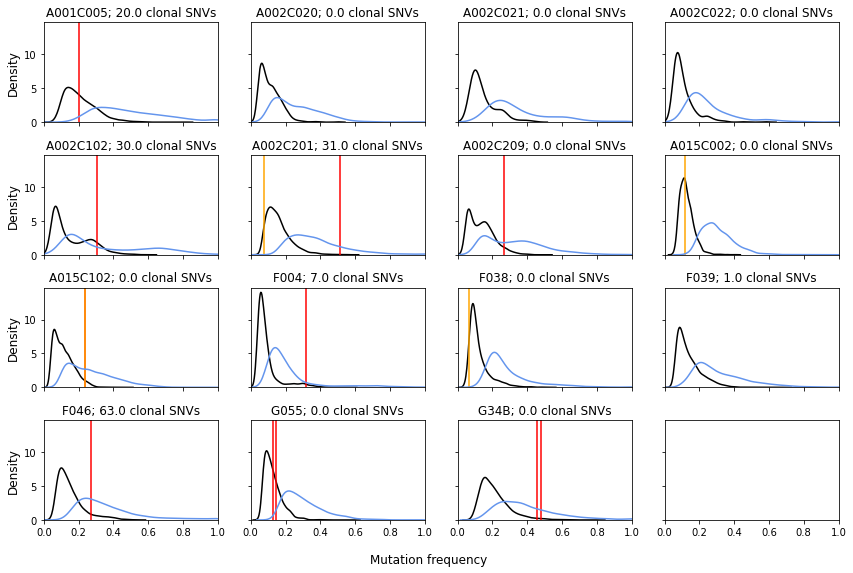

In [8]:
to_plot = expected_clonal[np.logical_and(expected_clonal["stage"]=="Dysplasia", expected_clonal["is_poly"])].index
to_plot = combined_maf[np.isin(combined_maf["Tumor_Sample_Barcode"], to_plot)]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WGS"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"dysplasia_poly_WGS.pdf")
    plt.savefig(plots_dir+"dysplasia_poly_WGS.jpg")
plt.show()

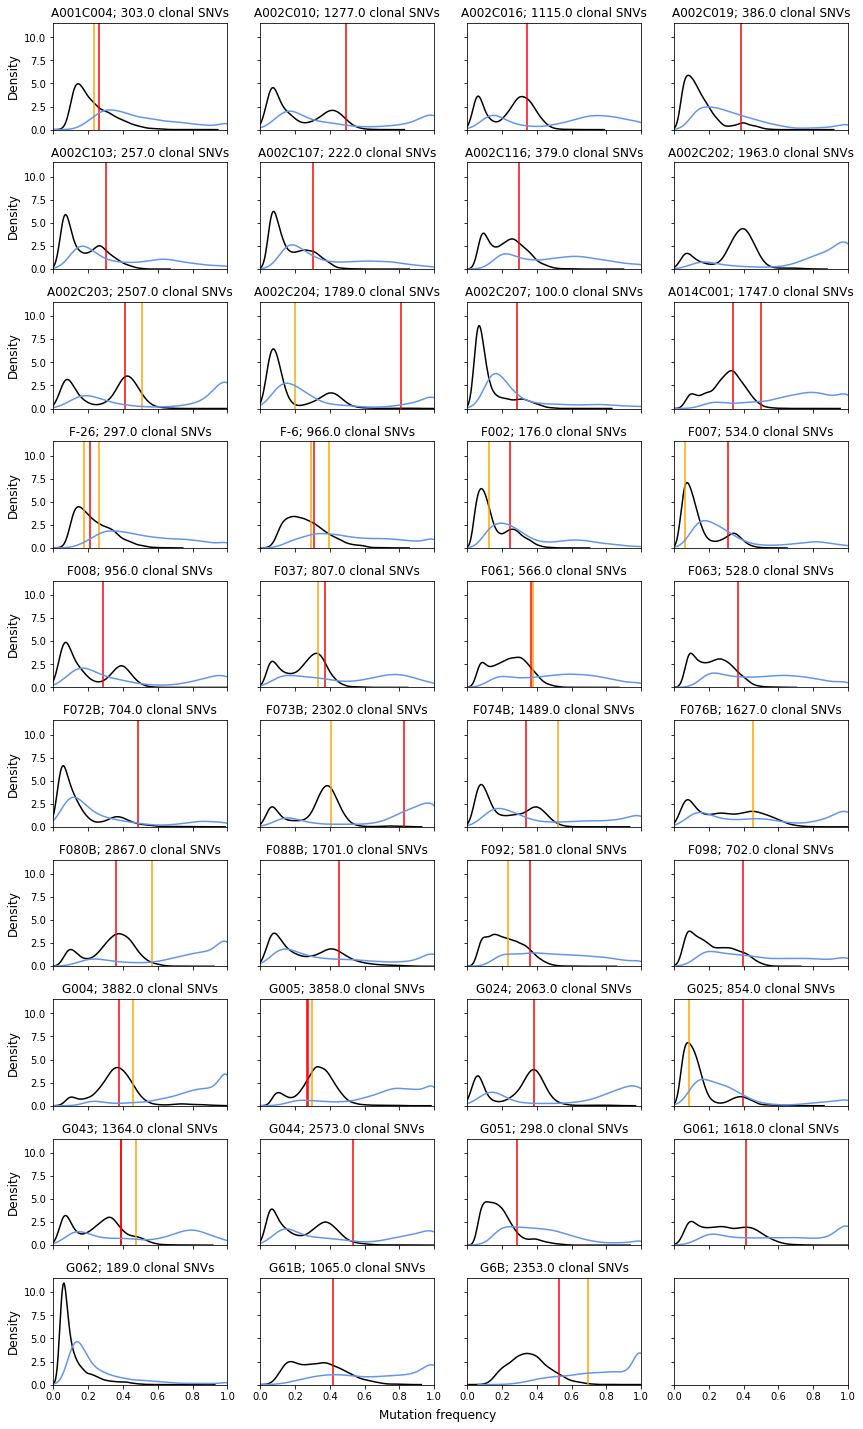

In [9]:
to_plot = expected_clonal[np.logical_and(expected_clonal["stage"]=="Dysplasia", ~expected_clonal["is_poly"])].index
to_plot = combined_maf[np.isin(combined_maf["Tumor_Sample_Barcode"], to_plot)]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WGS"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"dysplasia_mono_WGS.pdf")
    plt.savefig(plots_dir+"dysplasia_mono_WGS.jpg")
plt.show()

In [10]:
combined_maf = pd.read_csv(data_dir+"HTAN_WES_filtered_ppVAFs.maf", sep="\t")

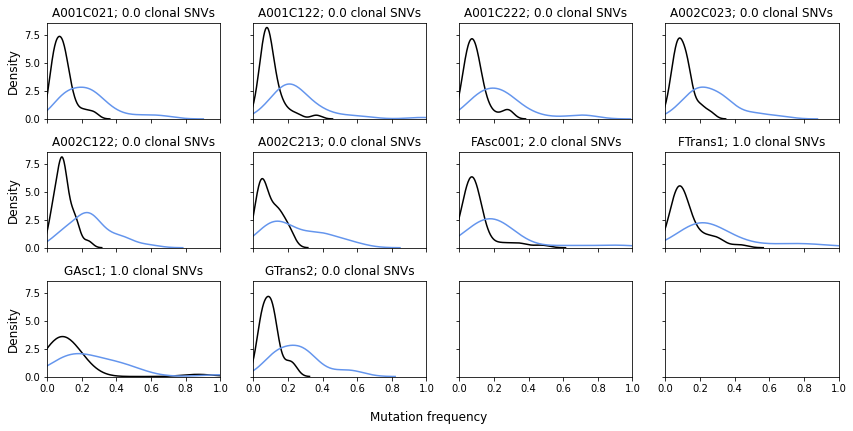

In [11]:
to_plot = combined_maf[combined_maf["Stage"]=="Mucosa"]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WES"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"mucosa_WES.pdf")
    plt.savefig(plots_dir+"mucosa_WES.jpg")
plt.show()

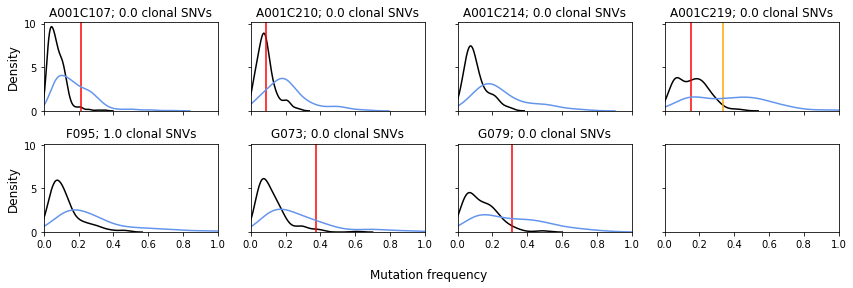

In [12]:
to_plot = expected_clonal[np.logical_and(expected_clonal["stage"]=="Benign", expected_clonal["is_poly"])].index
to_plot = combined_maf[np.isin(combined_maf["Tumor_Sample_Barcode"], to_plot)]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WES"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"benign_poly_WES.pdf")
    plt.savefig(plots_dir+"benign_poly_WES.jpg")
plt.show()

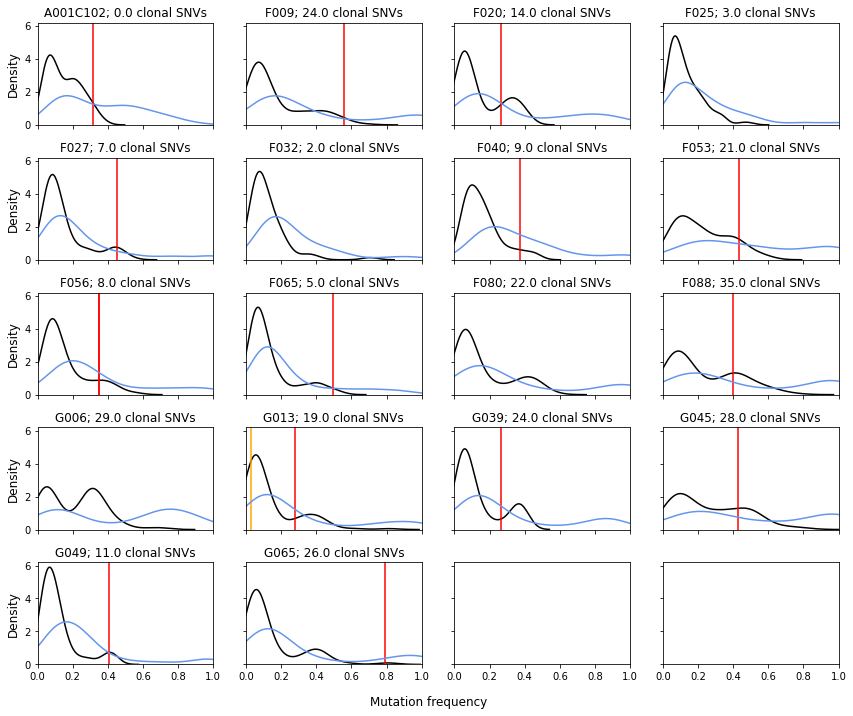

In [13]:
to_plot = expected_clonal[np.logical_and(expected_clonal["stage"]=="Benign", ~expected_clonal["is_poly"])].index
to_plot = combined_maf[np.isin(combined_maf["Tumor_Sample_Barcode"], to_plot)]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WES"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"benign_mono_WES.pdf")
    plt.savefig(plots_dir+"benign_mono_WES.jpg")
plt.show()

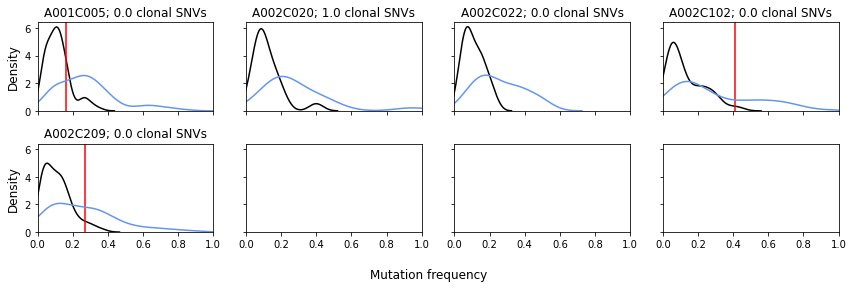

In [14]:
to_plot = expected_clonal[np.logical_and(expected_clonal["stage"]=="Dysplasia", expected_clonal["is_poly"])].index
to_plot = combined_maf[np.isin(combined_maf["Tumor_Sample_Barcode"], to_plot)]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WES"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"dysplasia_poly_WES.pdf")
    plt.savefig(plots_dir+"dysplasia_poly_WES.jpg")
plt.show()

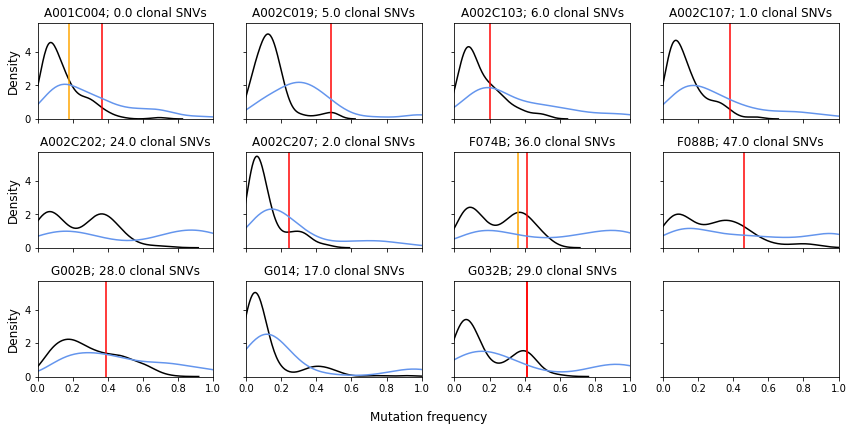

In [15]:
to_plot = expected_clonal[np.logical_and(expected_clonal["stage"]=="Dysplasia", ~expected_clonal["is_poly"])].index
to_plot = combined_maf[np.isin(combined_maf["Tumor_Sample_Barcode"], to_plot)]

sample_names = sorted(list(set(to_plot["Tumor_Sample_Barcode"])))

ncol = 4
nrow = int(np.ceil(len(sample_names)/ncol))
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3, nrow*2), sharex=True, sharey=True)
for i,sample in enumerate(sample_names):
    if nrow == 1:
        active_ax = axs[i]
    else:
        active_ax = axs[int(i/ncol), i%ncol]
    sample_plot = to_plot[to_plot["Tumor_Sample_Barcode"]==sample]
    plot_dist(sample_plot, active_ax, plot_var="vaf", plot_color="k", plot_drivers=True)
    plot_dist(sample_plot, active_ax, plot_var="ppVAF", plot_color="cornflowerblue", xlabel="")
    active_ax.set_title(sample+"; "+str(expected_clonal.loc[sample]["final_clonal_WES"])+" clonal SNVs")
fig.supxlabel('Mutation frequency')
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"dysplasia_mono_WES.pdf")
    plt.savefig(plots_dir+"dysplasia_mono_WES.jpg")
plt.show()